# Regression - Classification

## Exercise 1: Titanic, but correctly this time!

Take your linear regression model from the previous workshop on the titanic dataset.

Swap OLS for logistic regresssion and compare the classification model metrics (accuracy, ROC plot, F1, precision/recall).

How much better is logistic regression than OLS on binary data?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
import scipy.special
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures


In [2]:
# exercise 1

In [3]:
data = sns.load_dataset('titanic')
df = data.copy()
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.drop(['deck', 'alive', 'adult_male', 'who', 'class', 'embark_town', 'sibsp', 'parch'],
        axis=1, inplace=True)#remove redundency


In [5]:
df.isna().sum()#having null value summary

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
alone         0
dtype: int64

In [6]:
df.age = df.age.fillna(method='ffill')#fill null data with previous recored of nul one
df = df.dropna()

In [7]:
num_data = ['fare', 'age']#numerical data
cat_data = ['alone','sex', 'embarked']#categorial data

y = df.survived #target value
x = df[['fare', 'age']].copy()

x['age2'] = df.age**2 + df.age #t decrease the interaction of value and better fitting
x['fare2'] = df.fare**2 + df.fare

for col in cat_data: #making binary the categorial data
    x = x.join(pd.get_dummies(df[col], drop_first=True,prefix=col))
x.head(3)


,fare,age,age2,fare2,alone_True,sex_male,embarked_Q,embarked_S
0,7.2500,22.0,506.0,59.812500,0,1,0,1
1,71.2833,38.0,1482.0,5152.592159,0,0,0,0
2,7.9250,26.0,702.0,70.730625,1,0,0,1


In [8]:
scaler = MinMaxScaler() #scaling data to have the adjusting the range of value without disturbing the distrubution
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns = x.columns)#making dataframe from scaled data
x.head(3)

,fare,age,age2,fare2,alone_True,sex_male,embarked_Q,embarked_S
0,0.014151,0.271174,0.078002,0.000227,0.0,1.0,0.0,1.0
1,0.139136,0.472229,0.228633,0.019592,0.0,0.0,0.0,0.0
2,0.015469,0.321438,0.108251,0.000269,1.0,0.0,0.0,1.0


In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)
model = LogisticRegression() #train data by logisticregression
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)#target value prediction

True value: not survived :138
True value: survived :75
False value : not survived but predicted as survived:25
False value : survived but predicted not survived:29
Accuracy of logistic regression classifier on test set: 0.80


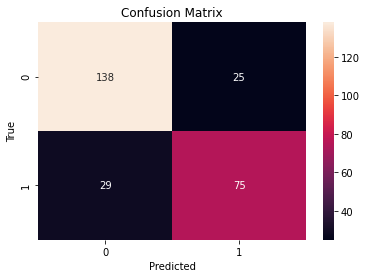

In [10]:
confu_matrix = confusion_matrix(ytest, ypred) #matrix of true positive, negative and false positive, negative respectively
sns.heatmap(confu_matrix, annot=True, fmt="d") #visualizing by heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

print(f'True value: not survived :{confu_matrix[0][0]}')
print(f'True value: survived :{confu_matrix[1][1]}')
print(f'False value : not survived but predicted as survived:{confu_matrix[0][1]}')
print(f'False value : survived but predicted not survived:{confu_matrix[1][0]}')

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(xtest,ytest))) #Percentage
#this regression in statsmodel has almost40% accuracy which is far lower than logistics.

In [11]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       163
           1       0.75      0.72      0.74       104

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



<AxesSubplot:xlabel='fare2', ylabel='survived'>

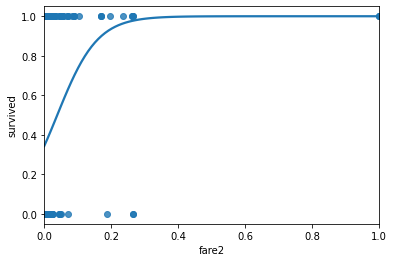

In [12]:
sns.regplot(x=xtrain.fare2, y=ytrain, logistic=True, ci=None) #logistic plot for feature of fare which has sigmoid like


<AxesSubplot:xlabel='age2', ylabel='survived'>

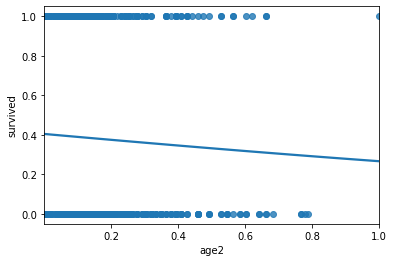

In [13]:
sns.regplot(x=xtrain.age2, y=ytrain, logistic=True, ci=None)#i don't know why this plot could not modled by logistic regression

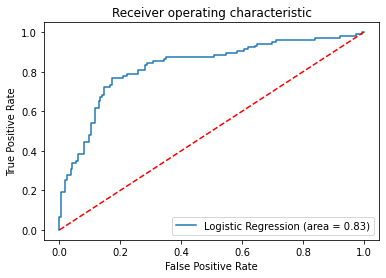

In [14]:
logit_roc_auc = roc_auc_score(ytest, model.predict_proba(xtest)[:,1])
fpr, tpr, thresholds = roc_curve(ytest, model.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Exercise 2: Intro To Computer Vision

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is a classic in computer vision. It's a database of manually written digits (from 0 to 9) scanned into a 28x28 pixel image.

The `X` matrix is 784 numbers (28x28) with numbers saying how dark the pixel is. The `y` variable is the number. The task is to use the images to do optical recognition.

You can fetch the dataset with the following command:

```
from sklearn.datasets import fetch_openml
fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
```

Use sklearn's logistic regression and any of the tricks you want to boost predictive accuracy. Here's a few notes:

- Use the sklearn `train_test_split` we saw in class to keep some holdout data to test on.
- You can use whatever sklearn preprocessing you think is relevant. Here's a few: 

```
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
```

- Since there's many features (especially if you use data augmentation like polynomial features), this is a good time to use regularization. Try to find the best regularization parameters possible.
- You should be able to get at least 80% on a test set size of 10_000

In [15]:
# exercise 2

In [34]:
data = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)


In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[0])
df= pd.DataFrame(scaled_data, data[1]).reset_index()
df.rename(columns = {'index':'number'}, inplace = True)
df.head(4)

,number,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, number to 783
dtypes: float64(784), object(1)
memory usage: 419.2+ MB


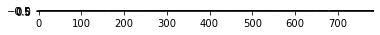

In [37]:
image = df.iloc[:1, 1: ]# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [20]:
#plt.matshow(df.iloc[:1, 1: ])

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(df.iloc[:70000,1:]/255, df.iloc[:70000,0], test_size=0.15 )
#all item in xtrain have been divided to 255 to make it easier in calcualation
#when the polynimial features was used the time process surged so just i used rescaling and simpl division.


In [55]:
xtrain.shape, ytrain.shape

((59500, 784), (59500,))

In [56]:
#train data through logisticregression by choosing the solver kind to process data
#and maximumm iteration, tolerance chosen as well.
log_reg = LogisticRegression(solver='sag',tol = 0.001, max_iter=1000)
log_reg.fit(xtrain, ytrain)
ypred = log_reg.predict(xtest)#predict the target value

In [57]:
print(confusion_matrix(ytest, ypred)) 

[[ 961    0    7    3    0   10   24    1   11    2]
 [   0 1147    8    4    0    2    1    1    9    1]
 [  16   41  861   35   23    4   25   22   31    3]
 [   6   19   40  889    1   18    8   23   33   15]
 [   2   30    1    0  908    3   19    5   14   74]
 [  15   42    9   73   15  691   34    5   28   23]
 [  18   22   12    0   10   14  919    1    8    0]
 [   3   43    8    0   21    1    2  946    5   46]
 [  15   85   14   60    9   34    7    6  800   24]
 [  11   27    2   23   54    5    0   54   10  885]]


In [61]:
print(f'Accuracy of logistic regression classifier on test set:{log_reg.score(xtest,ytest)}') #Percentage
print(classification_report(ytest, ypred))


Accuracy of logistic regression classifier on test set:0.8578095238095238
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1019
           1       0.79      0.98      0.87      1173
           2       0.90      0.81      0.85      1061
           3       0.82      0.85      0.83      1052
           4       0.87      0.86      0.87      1056
           5       0.88      0.74      0.80       935
           6       0.88      0.92      0.90      1004
           7       0.89      0.88      0.88      1075
           8       0.84      0.76      0.80      1054
           9       0.82      0.83      0.83      1071

    accuracy                           0.86     10500
   macro avg       0.86      0.86      0.86     10500
weighted avg       0.86      0.86      0.86     10500

